<a href="https://colab.research.google.com/github/2SUBDA/Breakouts/blob/Week9/Week9_Keras_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# BASIC WALK THROUGH FOR MNIST NN
# BASED ON TENSORFLOW TUTORIALS (2019)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras import backend as K
K.image_data_format()

import matplotlib.pyplot as plt
import time


In [2]:
# My test to make sure TF is working
# Updated for TF 2 - Hat tip to @Casey Mok

hello = tf.constant('Hello, TensorFlow!')
tf.print(hello)


Hello, TensorFlow!


In [3]:
# WHAT TYPE OF GPU ARE YOU USING
!nvidia-smi

Sun Aug 15 00:32:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    34W / 250W |    347MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# OBTAIN - THERE ARE MANY WAYS TO OBTAIN MNIST - THIS IS ONE

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

11493376/11490434 [==============================] - 0s 0us/step
Rows: 60000, columns: 28
Rows: 10000, columns: 28


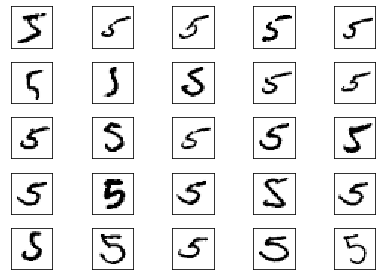

In [ ]:
# EXPLORE - VISUALIZE DIFFERENT VARIATIONS OF 5

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 5][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

In [ ]:
# SCRUB - FLATTENING FROM 28 x 28 TO 784
# THERE ARE MANY WAYS TO RESHAPE - THIS IS ONE

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

# print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

In [ ]:
# SCRUB - NORMALIZE INTENSITY VALUE

X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# SCRUB - ENCODE FOR LABEL

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
# MODEL - BUILD THE BASELINE

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


The following code actually runs the model - notice small number of epochs & lack of auto-stopping rule!

NOTE:  This is where the GPU comes in handy - running on CPU will take about 40 seconds - not bad but switching the runtime to GPU should bring the runtime down to ~ 15 secs!

In [ ]:
# MODEL - FIT THE BASE MODEL

start = time.time()  # TRACK TIME

model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# MODEL - RESULTS

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

end = time.time()
final_time = end-start
print(final_time)  # RUN TIME OF BLOCK

Epoch 1/10
300/300 - 4s - loss: 0.2812 - accuracy: 0.9198 - val_loss: 0.1406 - val_accuracy: 0.9589
Epoch 2/10
300/300 - 4s - loss: 0.1108 - accuracy: 0.9678 - val_loss: 0.0921 - val_accuracy: 0.9727
Epoch 3/10
300/300 - 4s - loss: 0.0714 - accuracy: 0.9792 - val_loss: 0.0779 - val_accuracy: 0.9765
Epoch 4/10
300/300 - 4s - loss: 0.0500 - accuracy: 0.9854 - val_loss: 0.0655 - val_accuracy: 0.9788
Epoch 5/10
300/300 - 4s - loss: 0.0364 - accuracy: 0.9895 - val_loss: 0.0646 - val_accuracy: 0.9791
Epoch 6/10
300/300 - 4s - loss: 0.0264 - accuracy: 0.9929 - val_loss: 0.0626 - val_accuracy: 0.9802
Epoch 7/10
300/300 - 4s - loss: 0.0194 - accuracy: 0.9952 - val_loss: 0.0596 - val_accuracy: 0.9821
Epoch 8/10
300/300 - 4s - loss: 0.0139 - accuracy: 0.9971 - val_loss: 0.0577 - val_accuracy: 0.9821
Epoch 9/10
300/300 - 4s - loss: 0.0107 - accuracy: 0.9977 - val_loss: 0.0624 - val_accuracy: 0.9798
Epoch 10/10
300/300 - 4s - loss: 0.0078 - accuracy: 0.9986 - val_loss: 0.0551 - val_accuracy: 0.9843

In [ ]:
# MODEL - TWO WAYS TO VISUALIZE

# tf.keras.utils.plot_model(model, show_shapes=True)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# MODEL
# RUN THE MODEL

model = baseline_model()

# FIT THE MODEL
# STORE THE MODEL RESULTS IN history TO USE FOR BUILDING ROC PLOT

history  = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# EVALUATE THE MODEL
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1885 - accuracy: 0.9427 - val_loss: 0.0857 - val_accuracy: 0.9729
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0755 - accuracy: 0.9765 - val_loss: 0.0797 - val_accuracy: 0.9743
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0492 - accuracy: 0.9841 - val_loss: 0.0790 - val_accuracy: 0.9769
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0344 - accuracy: 0.9887 - val_loss: 0.0678 - val_accuracy: 0.9782
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0266 - accuracy: 0.9914 - val_loss: 0.0612 - val_accuracy: 0.9818
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0852 - val_accuracy: 0.9765
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0175 - accuracy: 0.9939 - val_loss: 0.0778 - val_ac

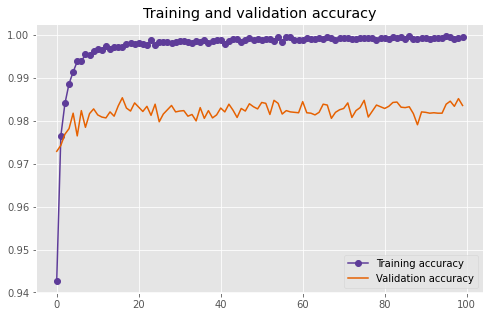

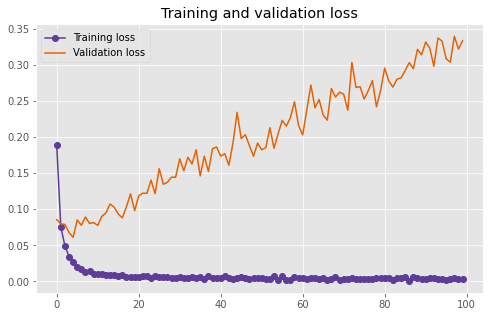

In [ ]:
# INTERPRET 
# BUILD FUNCTION FOR PLOTTING THE RESULTS OF THE MODEL

def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)

Now let us explore if adding some layers to the model can we fix that weird validation line above?


In [ ]:
# MODEL - ADD DROPOUT LAYER

def updated_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    # DROPOUT LAYER - SHOULD REDUCE OVERFITTING
    model.add(Dropout(0.15))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # COMPILE MODEL
    # OPTIMIZER - SGD
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [ ]:
# MODEL - FIT - https://keras.io/models/model/

start = time.time()  # TRACK TIME

model = updated_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)  

# BATCH SIZE CAN HELP WITH MEMORY - HOWEVER SMALLER BATCH MIGHT REDUCE ACCURACY
# NUMBER OF EPOCHS IS NUMBER OF TIMES THROUGH NETWORK   

end = time.time()
final_time = end-start
print(final_time)  # RUN TIME OF BLOCK

Epoch 1/10
300/300 - 1s - loss: 1.2539 - accuracy: 0.6858 - val_loss: 0.7142 - val_accuracy: 0.8495
Epoch 2/10
300/300 - 1s - loss: 0.6320 - accuracy: 0.8477 - val_loss: 0.4997 - val_accuracy: 0.8804
Epoch 3/10
300/300 - 1s - loss: 0.4997 - accuracy: 0.8705 - val_loss: 0.4214 - val_accuracy: 0.8931
Epoch 4/10
300/300 - 1s - loss: 0.4393 - accuracy: 0.8815 - val_loss: 0.3796 - val_accuracy: 0.9006
Epoch 5/10
300/300 - 1s - loss: 0.4026 - accuracy: 0.8895 - val_loss: 0.3521 - val_accuracy: 0.9053
Epoch 6/10
300/300 - 1s - loss: 0.3773 - accuracy: 0.8958 - val_loss: 0.3322 - val_accuracy: 0.9097
Epoch 7/10
300/300 - 1s - loss: 0.3593 - accuracy: 0.8999 - val_loss: 0.3169 - val_accuracy: 0.9132
Epoch 8/10
300/300 - 1s - loss: 0.3442 - accuracy: 0.9031 - val_loss: 0.3056 - val_accuracy: 0.9160
Epoch 9/10
300/300 - 1s - loss: 0.3324 - accuracy: 0.9061 - val_loss: 0.2949 - val_accuracy: 0.9193
Epoch 10/10
300/300 - 1s - loss: 0.3209 - accuracy: 0.9092 - val_loss: 0.2860 - val_accuracy: 0.9212

In [ ]:
# MODEL - TWO WAYS TO VISUALIZE

# tf.keras.utils.plot_model(model, show_shapes=True)
print(model.summary())

# NOTICE NO CHANGE TO TOTAL NUMBER OF PARAMETERS

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_4 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# MODEL
# RUN THE MODEL

model = updated_model()

# FIT THE MODEL
# STORE THE MODEL RESULTS IN history TO USE FOR BUILDING ROC PLOT

history  = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

# EVALUATE THE MODEL
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5944 - accuracy: 0.8456 - val_loss: 0.3345 - val_accuracy: 0.9087
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3291 - accuracy: 0.9074 - val_loss: 0.2744 - val_accuracy: 0.9227
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2783 - accuracy: 0.9206 - val_loss: 0.2380 - val_accuracy: 0.9338
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2447 - accuracy: 0.9309 - val_loss: 0.2143 - val_accuracy: 0.9411
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2218 - accuracy: 0.9374 - val_loss: 0.1946 - val_accuracy: 0.9463
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2004 - accuracy: 0.9434 - val_loss: 0.1808 - val_accuracy: 0.9490
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1854 - accuracy: 0.9483 - val_loss: 0.1680 - val_accuracy:

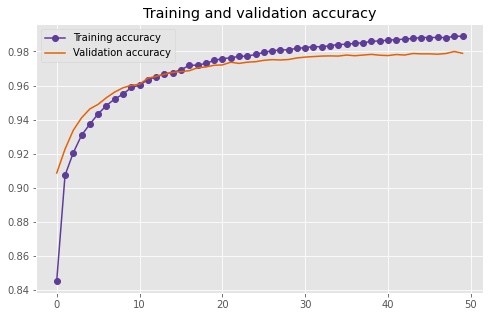

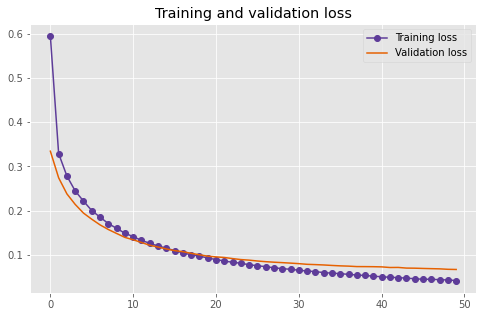

In [ ]:
# INTERPRET 
# DID ADDING DROPOUT FUNCTION HELP WITH OVERFITTING?

def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)